In [19]:
import pandas as pd 
data = pd.read_csv('CE802_Ass_2019_Data.csv')
test_features = pd.read_csv('CE802_Ass_2019_Test.csv').drop("Class",axis=1)

In [20]:
split = int(len(data) * 0.15)
validation = data[0:split]
train = data[split:]

In [21]:
train_labels = train["Class"]
train_features = train.drop("Class", axis=1)
validation_labels = validation["Class"]
validation_features = validation.drop("Class", axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127f49e90>,
      dtype=object)

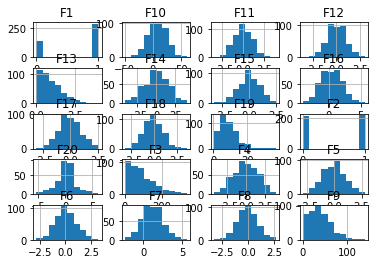

In [22]:
train_features.hist()

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

features_pipeline = ColumnTransformer([
  ("OneHot", OneHotEncoder(), ["F1", "F2"]),
  ("Imputer", SimpleImputer(strategy='mean'), ["F20"]),
],remainder="passthrough")
train_features_prepared = features_pipeline.fit_transform(train_features)
train_features_prepared = pd.DataFrame(train_features_prepared)

validation_features_prepared = features_pipeline.fit_transform(validation_features)
validation_features_prepared = pd.DataFrame(validation_features_prepared)

test_features_prepared = features_pipeline.fit_transform(test_features)
test_features_prepared = pd.DataFrame(test_features_prepared)


In [30]:
train_features_prepared.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,1.0,0.0,0.096377,109.0,0.53,-0.71,0.76,1.19,...,-17.0,0.34,-1.95,1.01,0.0,0.02,4.49,1.52,0.38,3.8
1,0.0,1.0,0.0,1.0,0.096377,166.0,0.07,0.06,-0.89,-0.11,...,8.0,-0.21,0.68,0.53,13.0,0.84,0.94,-0.16,-0.27,4.2
2,0.0,1.0,0.0,1.0,0.430000,119.0,-1.39,1.56,-1.51,0.34,...,16.0,-1.29,0.68,1.70,10.0,0.28,0.90,-0.18,-0.62,7.6
3,0.0,1.0,1.0,0.0,1.050000,57.0,-1.01,0.90,-0.06,1.63,...,-11.0,0.21,-0.93,1.18,-33.0,0.20,-2.59,0.21,0.22,5.7
4,0.0,1.0,1.0,0.0,-0.510000,12.0,0.16,-1.17,0.50,1.14,...,-8.0,-0.76,0.87,0.64,-13.0,-0.20,1.45,0.74,-0.67,4.6


In [26]:
train_features.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
75,0,0,109,0.53,-0.71,0.76,1.19,-0.05,54,-17,0.34,-1.95,1.01,0,0.02,4.49,1.52,0.38,3.8,NaN
76,1,1,166,0.07,0.06,-0.89,-0.11,-1.54,16,8,-0.21,0.68,0.53,13,0.84,0.94,-0.16,-0.27,4.2,NaN
77,1,1,119,-1.39,1.56,-1.51,0.34,0.89,45,16,-1.29,0.68,1.70,10,0.28,0.90,-0.18,-0.62,7.6,0.43
78,1,0,57,-1.01,0.90,-0.06,1.63,1.10,64,-11,0.21,-0.93,1.18,-33,0.20,-2.59,0.21,0.22,5.7,1.05
79,1,0,12,0.16,-1.17,0.50,1.14,-1.28,44,-8,-0.76,0.87,0.64,-13,-0.20,1.45,0.74,-0.67,4.6,-0.51
